In [1]:
WORKER_ID = 0

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]=str(WORKER_ID)

In [3]:
# whether to log each feature and sequence status
verbose = True

In [4]:
import gc
import os
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
import itertools
import sys
sys.path.append('..')

In [5]:
# setup paths
pwd = os.getcwd().replace("notebooks","")
path_cache = pwd + 'cache/'
path_data = pwd + 'data/'

In [6]:
# setup logging
# any explicit log messages or uncaught errors to stdout and file /logs.log
import logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(threadName)-12.12s] [%(levelname)-5.5s]  %(message)s",
    handlers=[
        logging.FileHandler("{0}/{1}.log".format(pwd, "logs")),
        logging.StreamHandler()
    ])
# init logger
logger = logging.getLogger()
# make logger aware of any uncaught exceptions
def handle_exception(exc_type, exc_value, exc_traceback):
    if issubclass(exc_type, KeyboardInterrupt):
        sys.__excepthook__(exc_type, exc_value, exc_traceback)
        return

    logger.error("Uncaught exception", exc_info=(exc_type, exc_value, exc_traceback))
sys.excepthook = handle_exception

In [7]:
from deepvideoclassification.architectures import Architecture

Using TensorFlow backend.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.5/logging/__init__.py", line 981, in emit
    msg = self.format(record)
  File "/usr/lib/python3.5/logging/__init__.py", line 831, in format
    return fmt.format(record)
  File "/usr/lib/python3.5/logging/__init__.py", line 568, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.5/logging/__init__.py", line 331, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  F

# Run experiments

In [8]:
experiment_batch_name = 'experiment_batch_1'

In [9]:
# load list of experiments
experiments = pd.read_csv(pwd + "experiments/" + experiment_batch_name + '.csv')

In [10]:
print(experiments.shape)

(5376, 12)


2019-01-20 11:17:13,720 [MainThread  ] [INFO ]  XXXXXX CUDAVISIBLE 1
2019-01-20 11:17:13,722 [MainThread  ] [INFO ]  Begin experiment for model_id=49
2019-01-20 11:17:13,723 [MainThread  ] [INFO ]  Model folder exists but no results found - potential error in previous model training
2019-01-20 11:17:13,724 [MainThread  ] [INFO ]  Loading data


49   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'architecture': 'image_MLP_frozen', 'sequence_model_layers': nan, 'sequence_length': 1.0, 'pretrained_model_name': 'inception_resnet_v2', 'sequence_model': nan, 'WORKER': 1, 'dropout': 0.2, 'layer_3_size': 256, 'model_id': 49, 'layer_2_size': 512, 'layer_1_size': 0, 'pooling': 'max'}


2019-01-20 11:17:14,629 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 11:17:14,631 [MainThread  ] [INFO ]  Loading features data into memory [may take a few minutes]


Done initializing data with #samples: train=60597, valid=6416, test=3139
Train on 60597 samples, validate on 6416 samples
Epoch 1/10
60597/60597 [==============================] - 8s 140us/step - loss: 0.2276 - acc: 0.9276 - val_loss: 0.2713 - val_acc: 0.9221

Epoch 00001: val_acc improved from -inf to 0.92211, saving model to /mnt/seals/models/49/model_round_1.h5
Epoch 2/10
60597/60597 [==============================] - 7s 118us/step - loss: 0.1886 - acc: 0.9399 - val_loss: 0.2610 - val_acc: 0.9351

Epoch 00002: val_acc improved from 0.92211 to 0.93512, saving model to /mnt/seals/models/49/model_round_1.h5
Epoch 3/10
60597/60597 [==============================] - 7s 120us/step - loss: 0.1787 - acc: 0.9427 - val_loss: 0.3305 - val_acc: 0.9096

Epoch 00003: val_acc did not improve from 0.93512
Epoch 4/10
60597/60597 [==============================] - 7s 119us/step - loss: 0.1738 - acc: 0.9445 - val_loss: 0.2972 - val_acc: 0.9119

Epoch 00004: val_acc did not improve from 0.93512
Epoch 5

2019-01-20 11:19:16,974 [MainThread  ] [INFO ]  {'architecture': 'image_mlp_frozen', 'model_param_count': 0, 'sequence_model_layers': nan, 'dropout': 0.2, 'fit_train_acc': 0.9629826214430873, 'fit_val_loss': 0.24125832531071661, 'model_weights_path': None, 'fit_dt_train_end': '2019-01-20 11:19:15', 'model_id': 49, 'data_total_rows_test': 3139, 'fit_best_round': 3, 'fit_num_epochs': 10, 'fit_train_loss': 0.10312273400908742, 'pooling': 'max', 'batch_size': 32, 'fit_dt_test_start': '2019-01-20 11:19:15', 'layer_1_size': 0, 'fit_dt_train_start': '2019-01-20 11:17:15', 'data_total_rows_train': 60597, 'frame_size': (299, 299), 'sequence_length': 1.0, 'pretrained_model_name': 'inception_resnet_v2', 'layer_2_size': 512, 'fit_dt_test_duration_seconds': '0', 'path_model': '/mnt/seals/models/49/', 'sequence_model': nan, 'fit_stopped_epoch2': 2, 'fit_stopped_epoch3': 3, 'fit_stopped_epoch1': 2, 'data_total_rows_valid': 6416, 'fit_val_acc': 0.9204667091666909, 'layer_3_size': 256, 'num_features': 

57   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'architecture': 'image_MLP_frozen', 'sequence_model_layers': nan, 'sequence_length': 1.0, 'pretrained_model_name': 'inception_resnet_v2', 'sequence_model': nan, 'WORKER': 1, 'dropout': 0.2, 'layer_3_size': 256, 'model_id': 57, 'layer_2_size': 128, 'layer_1_size': 0, 'pooling': 'max'}


2019-01-20 11:19:17,884 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 11:19:17,885 [MainThread  ] [INFO ]  Loading features data into memory [may take a few minutes]


Done initializing data with #samples: train=60597, valid=6416, test=3139
Train on 60597 samples, validate on 6416 samples
Epoch 1/10
60597/60597 [==============================] - 8s 125us/step - loss: 0.2234 - acc: 0.9271 - val_loss: 0.2903 - val_acc: 0.9109

Epoch 00001: val_acc improved from -inf to 0.91089, saving model to /mnt/seals/models/57/model_round_1.h5
Epoch 2/10
60597/60597 [==============================] - 7s 120us/step - loss: 0.1877 - acc: 0.9394 - val_loss: 0.4372 - val_acc: 0.8847

Epoch 00002: val_acc did not improve from 0.91089
Epoch 3/10
60597/60597 [==============================] - 7s 119us/step - loss: 0.1762 - acc: 0.9433 - val_loss: 0.3631 - val_acc: 0.8986

Epoch 00003: val_acc did not improve from 0.91089
Epoch 4/10
60597/60597 [==============================] - 7s 120us/step - loss: 0.1730 - acc: 0.9447 - val_loss: 0.3233 - val_acc: 0.9198

Epoch 00004: val_acc improved from 0.91089 to 0.91978, saving model to /mnt/seals/models/57/model_round_1.h5
Epoch 5

2019-01-20 11:21:21,060 [MainThread  ] [INFO ]  {'architecture': 'image_mlp_frozen', 'model_param_count': 0, 'sequence_model_layers': nan, 'dropout': 0.2, 'fit_train_acc': 0.9638996869628103, 'model_weights_path': None, 'fit_dt_train_end': '2019-01-20 11:21:18', 'model_id': 57, 'data_total_rows_test': 3139, 'fit_best_round': 3, 'fit_num_epochs': 10, 'fit_train_loss': 0.10114483635398065, 'fit_val_loss': 0.2731206151389719, 'pooling': 'max', 'batch_size': 32, 'fit_dt_test_start': '2019-01-20 11:21:19', 'layer_1_size': 0, 'data_total_rows_train': 60597, 'frame_size': (299, 299), 'fit_dt_train_start': '2019-01-20 11:19:18', 'sequence_length': 1.0, 'pretrained_model_name': 'inception_resnet_v2', 'layer_2_size': 128, 'fit_dt_test_duration_seconds': '0', 'path_model': '/mnt/seals/models/57/', 'sequence_model': nan, 'fit_stopped_epoch3': 1, 'fit_stopped_epoch2': 2, 'fit_stopped_epoch1': 4, 'data_total_rows_valid': 6416, 'fit_val_acc': 0.9128295510189789, 'layer_3_size': 256, 'num_features': 1

65   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'architecture': 'image_MLP_frozen', 'sequence_model_layers': nan, 'sequence_length': 1.0, 'pretrained_model_name': 'vgg16', 'sequence_model': nan, 'WORKER': 1, 'dropout': 0.2, 'layer_3_size': 256, 'model_id': 65, 'layer_2_size': 512, 'layer_1_size': 512, 'pooling': 'max'}


2019-01-20 11:21:21,993 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/vgg16/max/
2019-01-20 11:21:21,995 [MainThread  ] [INFO ]  Loading features data into memory [may take a few minutes]


Done initializing data with #samples: train=60597, valid=6416, test=3139
Train on 60597 samples, validate on 6416 samples
Epoch 1/10
 7840/60597 [==>...........................] - ETA: 14s - loss: 0.7593 - acc: 0.8923

KeyboardInterrupt: 

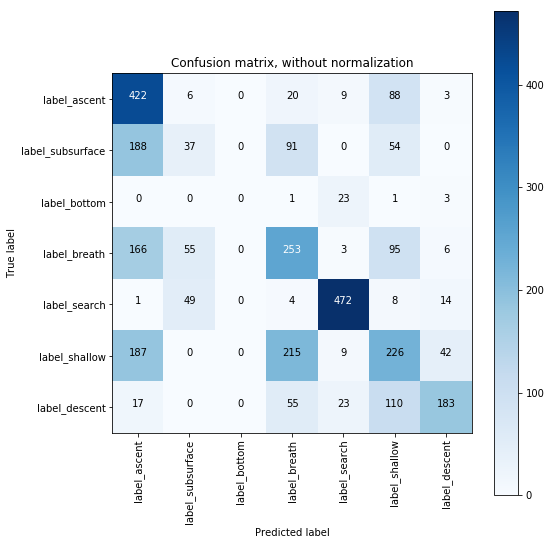

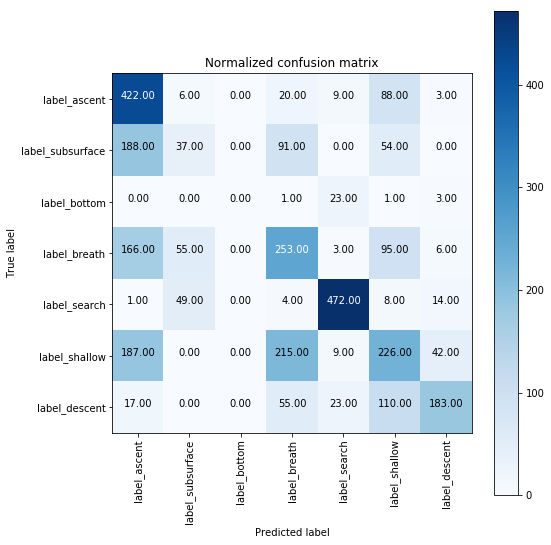

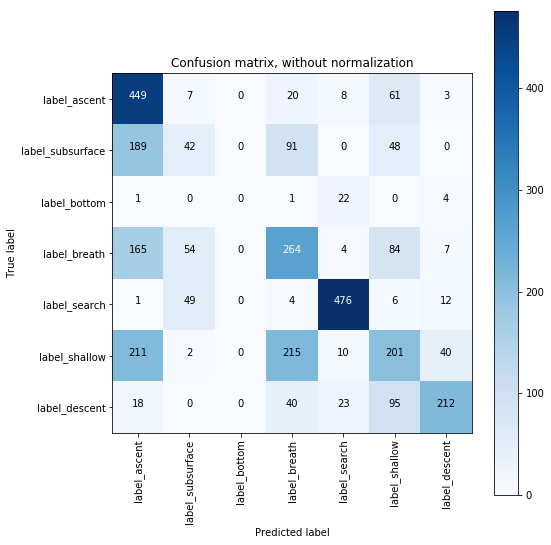

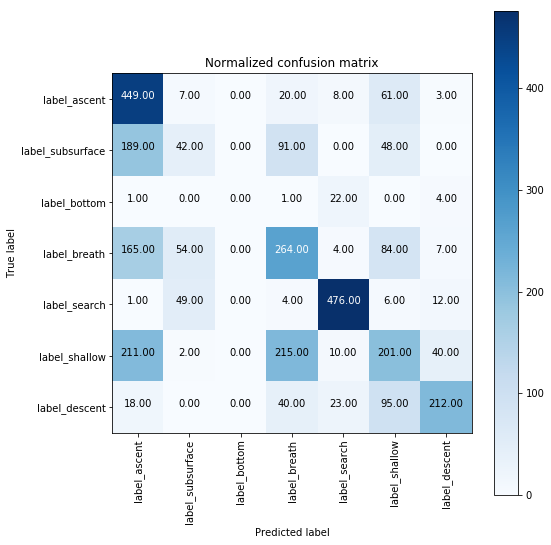

In [12]:
###################
### Run experiments
###################

for row in experiments.values:
    
    # get experiment params from dataframe row
    experiment = dict(zip(experiments.columns, row))
    
    # only run experiment if not already run
    if not os.path.exists(pwd + 'models/' + str(experiment["model_id"]) + '/results.json'):

        # only run experiment if matches this worker id
        if experiment['WORKER'] == WORKER_ID:
            
            logging.info('XXXXXX CUDAVISIBLE ' + os.environ["CUDA_VISIBLE_DEVICES"])
            
            logging.info("Begin experiment for model_id={}".format(experiment['model_id']))
            
            print(str(experiment["model_id"]) + "   " + "X"*60)
            print(experiment)

            architecture = Architecture(model_id = experiment['model_id'], 
                                        architecture = experiment['architecture'], 
                                        sequence_length = experiment['sequence_length'], 
                                        pretrained_model_name = experiment['pretrained_model_name'],
                                        pooling = experiment['pooling'],
                                        sequence_model = experiment['sequence_model'],
                                        sequence_model_layers = experiment['sequence_model_layers'],
                                        layer_1_size = experiment['layer_1_size'],
                                        layer_2_size = experiment['layer_2_size'],
                                        layer_3_size = experiment['layer_3_size'],
                                        dropout = experiment['dropout'],
                                        verbose=True)

            architecture.train_model()